In [1]:
import pandas as pd

In [2]:
#Excel-Datei einlesen, Test mit der ersten Gemeinde
df1 = pd.read_excel("Excel-Files/Balzers.xls")
df1.head(2)

,Schätzungsdatum,Gebäudeart,Neuwert,Stand BKI Neuwert\n,SIA-Norm,Kubatur
0,10.02.2000,Wohnhaus,303000.0,854.4,SIA 116,374.0
1,29.07.2003,Einfamilienhaus,305000.0,928.4,SIA 116,465.0


In [3]:
#Datum in datetime umwandeln
df1["Schätzungsdatum_neu"] = pd.to_datetime(df1["Schätzungsdatum"], format="%d.%m.%Y")
df1.head(2)

,Schätzungsdatum,Gebäudeart,Neuwert,Stand BKI Neuwert\n,SIA-Norm,Kubatur,Schätzungsdatum_neu
0,10.02.2000,Wohnhaus,303000.0,854.4,SIA 116,374.0,2000-02-10
1,29.07.2003,Einfamilienhaus,305000.0,928.4,SIA 116,465.0,2003-07-29


In [4]:
#Datum als Index setzen
df1.set_index("Schätzungsdatum_neu", inplace=True)
df1.head(2)

,Schätzungsdatum,Gebäudeart,Neuwert,Stand BKI Neuwert\n,SIA-Norm,Kubatur
Schätzungsdatum_neu,,,,,,
2000-02-10,10.02.2000,Wohnhaus,303000.0,854.4,SIA 116,374.0
2003-07-29,29.07.2003,Einfamilienhaus,305000.0,928.4,SIA 116,465.0


In [5]:
#unnötige Spalten löschen und sauber beschriften
df1.rename(columns={"Stand BKI Neuwert\n": "BKI Neuwert"}, inplace=True)
df1.pop("Schätzungsdatum")
df1.pop("SIA-Norm")
df1.head(2)

,Gebäudeart,Neuwert,BKI Neuwert,Kubatur
Schätzungsdatum_neu,,,,
2000-02-10,Wohnhaus,303000.0,854.4,374.0
2003-07-29,Einfamilienhaus,305000.0,928.4,465.0


In [6]:
#Achsentitel löschen
df1.rename_axis(None, inplace=True)
df1.head(2)

,Gebäudeart,Neuwert,BKI Neuwert,Kubatur
2000-02-10,Wohnhaus,303000.0,854.4,374.0
2003-07-29,Einfamilienhaus,305000.0,928.4,465.0


In [7]:
#Index sortieren
df1.sort_index(inplace=True)
df1.head(2)

,Gebäudeart,Neuwert,BKI Neuwert,Kubatur
1986-12-01,Einfamilienhaus,346000.0,705.2,907.0
1990-05-30,Wohnhaus,393000.0,802.4,760.0


In [8]:
#Ich will im Index nur die Jahre
df1.index = df1.index.to_period("Y")
df1.head(2)

,Gebäudeart,Neuwert,BKI Neuwert,Kubatur
1986,Einfamilienhaus,346000.0,705.2,907.0
1990,Wohnhaus,393000.0,802.4,760.0


In [9]:
#Ich will die Jahre 1995 bis 2020 auswerten
df1 = df1.loc["1995":"2020"]
df1.head(2)

,Gebäudeart,Neuwert,BKI Neuwert,Kubatur
1995,Wohnhaus,531000.0,856.0,813.0
1995,Wohnhaus,608000.0,856.0,952.0


## Über alle Gemeinde loopen und in einer Tabelle kombinieren

In [10]:
excel_files = [("Balzers.xls", "Balzers"), ("Eschen.xls", "Eschen"), ("Gamprin.xls", "Gamprin"), ("Mauren.xls", "Mauren"), ("Nendeln.xls", "Nendeln"), ("Ruggell.xls", "Ruggell"), ("Schaan.xls", "Schaan"), ("Schaanwald.xls", "Schaanwald"), ("Schellenberg.xls", "Schellenberg"), ("Triesen.xls", "Triesen"), ("Triesenberg.xls", "Triesenberg"), ("Vaduz.xls", "Vaduz")]
df_list = []

for file, city in excel_files:
    df = pd.read_excel(f"Excel-Files/{file}")
    df["Schätzungsdatum_neu"] = pd.to_datetime(df["Schätzungsdatum"], format="%d.%m.%Y")
    df.set_index("Schätzungsdatum_neu", inplace=True)
    df.rename(columns={"Stand BKI Neuwert\n": "BKI Neuwert"}, inplace=True)
    df.pop("Schätzungsdatum")
    df.pop("SIA-Norm")
    df.rename_axis(None, inplace=True)
    df.sort_index(inplace=True)
    df.index = df.index.to_period("Y")
    df = df.loc["1995":"2020"]
    df["Gemeinde"] = city
    df_list.append(df)

In [11]:
#alle Gemeinden zusammenfassen
df_gemeinden = pd.concat(df_list, axis=0)
df_gemeinden

,Gebäudeart,Neuwert,BKI Neuwert,Kubatur,Gemeinde
1995,Wohnhaus,531000.0,856.0,813.0,Balzers
1995,Wohnhaus,608000.0,856.0,952.0,Balzers
1995,Wohnhaus,368000.0,856.0,670.0,Balzers
1995,Wohnhaus,368000.0,856.0,667.0,Balzers
1995,Wohnhaus,545000.0,865.2,910.0,Balzers
...,...,...,...,...,...
2020,Mehrfamilienhaus,4400000.0,1046.3,5360.0,Vaduz
2020,Mehrfamilienhaus,1650000.0,1046.3,1995.0,Vaduz
2020,Einfamilienhaus,1520000.0,1046.3,2030.0,Vaduz
2020,Einfamilienhaus,950000.0,1046.3,1070.0,Vaduz


# Neuwerte auf das richtige Jahr indexieren
Die Daten sind in einem separaten Excel

In [12]:
#Ich brauch hier nur einen Teil des Files, so spare ich mir grosses Putzen des df
dfbki = pd.read_excel("Excel-Files/BKIJahr.xlsx", usecols="C:D", skiprows=2, nrows=82)
dfbki

,Jahr,Stand
0,1939,100.0
1,1940,112.4
2,1941,129.6
3,1942,146.0
4,1943,152.4
...,...,...
77,2016,1034.4
78,2017,1034.5
79,2018,1036.8
80,2019,1046.3


In [13]:
#Daten gehen bis ins Jahr 1939 zurück. Ich brauch ab 1995. Überflüssige Zeilen gemäss Index raushauen
dfbki.drop(dfbki.index[0:56], inplace=True)
dfbki.head

<bound method NDFrame.head of     Jahr   Stand
56  1995   874.2
57  1996   861.4
58  1997   847.4
59  1998   843.8
60  1999   854.4
61  2000   887.1
62  2001   929.3
63  2002   928.4
64  2003   899.2
65  2004   907.6
66  2005   929.5
67  2006   944.5
68  2007   987.4
69  2008  1026.8
70  2009  1030.7
71  2010  1042.6
72  2011  1059.8
73  2012  1067.4
74  2013  1060.9
75  2014  1066.1
76  2015  1053.2
77  2016  1034.4
78  2017  1034.5
79  2018  1036.8
80  2019  1046.3
81  2020  1045.6>

In [14]:
#Welches Format hat eigentlich die Jahresspalte?
dfbki.dtypes

Jahr       int64
Stand    float64
dtype: object

In [15]:
#Die Jahresspalte zu datetime machen
dfbki["Jahr_neu"] = pd.to_datetime(dfbki["Jahr"], format="%Y")
dfbki.head(3)

,Jahr,Stand,Jahr_neu
56,1995,874.2,1995-01-01
57,1996,861.4,1996-01-01
58,1997,847.4,1997-01-01


In [16]:
#Die alte Jahresspalte kann weg
dfbki.pop("Jahr")
dfbki.head(2)

,Stand,Jahr_neu
56,874.2,1995-01-01
57,861.4,1996-01-01


In [17]:
#Ich will die Jahre wieder als Index
dfbki.set_index("Jahr_neu", inplace=True)
dfbki.head(2)

,Stand
Jahr_neu,
1995-01-01,874.2
1996-01-01,861.4


In [18]:
#Achsentitel kann weg
dfbki.rename_axis(None, inplace=True)
dfbki.head(2)

,Stand
1995-01-01,874.2
1996-01-01,861.4


In [19]:
#Und jetzt wieder nur die Jahre als PeriodIndex, damit ich die df's nachher nach Jahr kombinieren kann
dfbki.index = dfbki.index.to_period("Y")
dfbki.head(2)

,Stand
1995,874.2
1996,861.4


In [20]:
#Spalte richtig anschreiben
dfbki = dfbki.rename(columns={"Stand": "BKI Jahr"})
dfbki.head(2)

,BKI Jahr
1995,874.2
1996,861.4


In [21]:
#stimmt das Indexformat?
dfbki.index

PeriodIndex(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
             '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
             '2019', '2020'],
            dtype='period[A-DEC]')

## Gemeinde mit BKI kombinieren

In [22]:
df_gemeinden_merged = df_gemeinden.combine_first(dfbki) #diese Methode war einfacher als merge
df_gemeinden_merged.head(5)

,BKI Jahr,BKI Neuwert,Gebäudeart,Gemeinde,Kubatur,Neuwert
1995,874.2,856.0,Wohnhaus,Balzers,813.0,531000.0
1995,874.2,856.0,Wohnhaus,Balzers,952.0,608000.0
1995,874.2,856.0,Wohnhaus,Balzers,670.0,368000.0
1995,874.2,856.0,Wohnhaus,Balzers,667.0,368000.0
1995,874.2,865.2,Wohnhaus,Balzers,910.0,545000.0


In [23]:
#Reihenfolge der Spalten anpassen und überflüssige raus
df_gemeinden_merged = df_gemeinden_merged[["Gemeinde", "Neuwert", "BKI Neuwert", "BKI Jahr", "Kubatur"]]
df_gemeinden_merged.head(3)

,Gemeinde,Neuwert,BKI Neuwert,BKI Jahr,Kubatur
1995,Balzers,531000.0,856.0,874.2,813.0
1995,Balzers,608000.0,856.0,874.2,952.0
1995,Balzers,368000.0,856.0,874.2,670.0


In [24]:
#neue Werte, die ich brauche, in neuen Spalten berechnen
df_gemeinden_merged["Neuwert indexiert"] = df_gemeinden_merged["BKI Jahr"] * df_gemeinden_merged["Neuwert"] / df_gemeinden_merged["BKI Neuwert"]
df_gemeinden_merged["Erstellungskosten m3"] = df_gemeinden_merged["Neuwert indexiert"] / df_gemeinden_merged["Kubatur"]
df_gemeinden_merged.head(2)

,Gemeinde,Neuwert,BKI Neuwert,BKI Jahr,Kubatur,Neuwert indexiert,Erstellungskosten m3
1995,Balzers,531000.0,856.0,874.2,813.0,542289.953271,667.023313
1995,Balzers,608000.0,856.0,874.2,952.0,620927.102804,652.234352


## Auswertung
Ich will die Erstellungskosten m3und den Median für die einzelnen Jahre

In [25]:
df_auswertung = df_gemeinden_merged.groupby(df_gemeinden_merged.index.year)["Erstellungskosten m3"].agg(["median"])
df_auswertung.head(5)

,median
1995,634.423898
1996,612.756332
1997,634.669317
1998,631.352709
1999,668.148139


In [26]:
#ganzes df anschauen und prüfen, ob alle Jahre drin sind
df_auswertung

,median
1995,634.423898
1996,612.756332
1997,634.669317
1998,631.352709
1999,668.148139
2000,683.387537
2001,701.462876
2002,669.648562
2003,658.666326
2004,686.396102


## Vergleich Kosten-/Lohnenwicklung
Dafür brauch ich die Tabelle mit den Medianlöhnen von 1994-2020

In [27]:
df_median = pd.read_excel("Excel-Files/Medianlöhne FL.xlsx", sheet_name="Medianlöhne FL")
df_median.head(2)

,Jahr,Medianlohn/CHF
0,1994-01-01,5020.825329
1,1995-01-01,NaN


In [28]:
#gleich wie oben... Zeitverlauf als Index und nur das Jahr in Indexspalte
df_median.set_index("Jahr", inplace=True)
df_median.index = df_median.index.year
df_median.rename_axis(None, inplace=True)
df_median.head(3)

,Medianlohn/CHF
1994,5020.825329
1995,NaN
1996,5173.458419


In [29]:
df_median.shape

(27, 1)

In [30]:
df_auswertung.shape

(26, 1)

In [31]:
#mittlere Erstellungskosten/m3 mit Medianlöhnen kombinieren
df_gemeinden_median = df_auswertung.merge(df_median, how="inner", left_index=True, right_index=True) 
df_gemeinden_median.head(3)

,median,Medianlohn/CHF
1995,634.423898,NaN
1996,612.756332,5173.458419
1997,634.669317,NaN


In [32]:
#Zahlen runden
df_gemeinden_median = df_gemeinden_median.round(decimals = 1)
df_gemeinden_median.head(2)

,median,Medianlohn/CHF
1995,634.4,NaN
1996,612.8,5173.5


### Output: Prozentuale Entwicklung der Erstellungskosten/m3 und Löhne 1996 vs. 2020
Verwendet wurde der Medianlohn 1996, weil der Wert nur zweijährlich publiziert wird

In [33]:
#benötigte Jahre anzeigen
df_19962020 = df_gemeinden_median.loc[df_gemeinden_median.index.isin([1996, 2020])]
df_19962020

,median,Medianlohn/CHF
1996,612.8,5173.5
2020,858.5,6852.0


In [34]:
#prozentuale Veränderung ausrechnen
df_19962020["median %"] = df_19962020["median"].pct_change() * 100
df_19962020["Medianlohn/CHF %"] = df_19962020["Medianlohn/CHF"].pct_change() *100
df_19962020

/var/folders/t8/xl0xzpb57bz854gpvcy7rr_r0000gn/T/ipykernel_18991/2813787074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19962020["median %"] = df_19962020["median"].pct_change() * 100
/var/folders/t8/xl0xzpb57bz854gpvcy7rr_r0000gn/T/ipykernel_18991/2813787074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19962020["Medianlohn/CHF %"] = df_19962020["Medianlohn/CHF"].pct_change() *100


,median,Medianlohn/CHF,median %,Medianlohn/CHF %
1996,612.8,5173.5,NaN,NaN
2020,858.5,6852.0,40.094648,32.444187


In [35]:
#Spalten richtig anschreiben und Werte runden
df_19962020 = df_19962020.rename(columns={"median" : "Baukosten m3", "count" : "Anz. Gebäude", "Medianlohn/CHF" : "Medianlohn", "median %" : "Veränd. Kosten %", "Medianlohn/CHF %" :"Veränd. Medianlohn %"})
df_19962020 = df_19962020.round(decimals = 1)
df_19962020

,Baukosten m3,Medianlohn,Veränd. Kosten %,Veränd. Medianlohn %
1996,612.8,5173.5,NaN,NaN
2020,858.5,6852.0,40.1,32.4


## Plotten

In [36]:
import matplotlib.pyplot as plt

In [37]:
#Zur Sicherheit mach ich das in einem neuen df
df_gemeinden_plot = df_gemeinden_median[["median", "Medianlohn/CHF"]]
df_gemeinden_plot.head(3)

,median,Medianlohn/CHF
1995,634.4,NaN
1996,612.8,5173.5
1997,634.7,NaN


In [38]:
#Medianlohn von 1996, da es für 1995 keinen Wert gibt
df_gemeinden_plot = df_gemeinden_plot.loc[df_gemeinden_plot.index > 1995]
df_gemeinden_plot

,median,Medianlohn/CHF
1996,612.8,5173.5
1997,634.7,NaN
1998,631.4,5293.9
1999,668.1,NaN
2000,683.4,5414.0
2001,701.5,NaN
2002,669.6,5618.0
2003,658.7,NaN
2004,686.4,5754.0
2005,694.2,NaN


In [40]:
#Werte auf 100 indexieren - brauch ich nachher für eine Trendlinie
df_gemeinden_indexiert = df_gemeinden_plot / df_gemeinden_plot.loc[1996, :] * 100
df_gemeinden_indexiert

,median,Medianlohn/CHF
1996,100.000000,100.000000
1997,103.573760,NaN
1998,103.035248,102.327245
1999,109.024151,NaN
2000,111.520888,104.648690
2001,114.474543,NaN
2002,109.268930,108.591862
2003,107.490209,NaN
2004,112.010444,111.220644
2005,113.283290,NaN


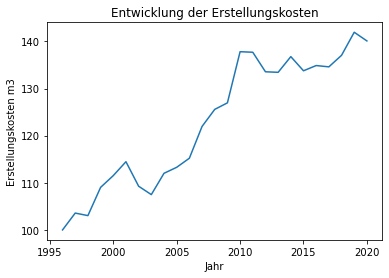

In [42]:
#Versuchen wir mal, das zu plotten
plt.plot(df_gemeinden_indexiert.index, df_gemeinden_indexiert["median"])
plt.xlabel("Jahr")
plt.ylabel("Erstellungskosten m3")
plt.title("Entwicklung der Erstellungskosten")
plt.show()

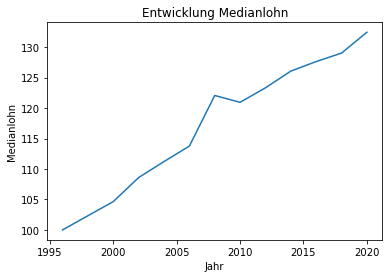

In [43]:
#Und jetzt den Medianlohn. Dafür muss ich aber die NaN-Werte rausschmeissen
df_medianlohn = df_gemeinden_indexiert.dropna(subset=["Medianlohn/CHF"])

plt.plot(df_medianlohn.index, df_medianlohn["Medianlohn/CHF"])
plt.xlabel("Jahr")
plt.ylabel("Medianlohn")
plt.title("Entwicklung Medianlohn")
plt.show()

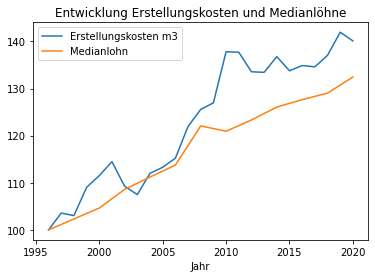

In [44]:
#beide Linien in einer Grafik

plt.plot(df_gemeinden_indexiert.index, df_gemeinden_indexiert["median"])
plt.plot(df_medianlohn.index, df_medianlohn['Medianlohn/CHF'])
plt.xlabel("Jahr")
plt.title("Entwicklung Erstellungskosten und Medianlöhne")
plt.legend(["Erstellungskosten m3", "Medianlohn"])
plt.show()

In [45]:
import numpy as np

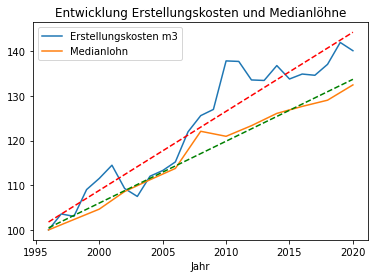

In [46]:
#Trendlinie einzeichnen

plt.plot(df_gemeinden_indexiert.index, df_gemeinden_indexiert["median"])
plt.plot(df_medianlohn.index, df_medianlohn["Medianlohn/CHF"])

# Trendline für die Erstellungskosten
z = np.polyfit(df_gemeinden_indexiert.index, df_gemeinden_indexiert["median"], 1)
p = np.poly1d(z)
plt.plot(df_gemeinden_indexiert.index, p(df_gemeinden_indexiert.index), "r--")

# Trendline für den Medianlohn
z = np.polyfit(df_medianlohn.index, df_medianlohn["Medianlohn/CHF"], 1)
p = np.poly1d(z)
plt.plot(df_medianlohn.index, p(df_medianlohn.index), "g--")

plt.xlabel("Jahr")
#plt.ylabel('Median')
plt.title("Entwicklung Erstellungskosten und Medianlöhne")
plt.legend(["Erstellungskosten m3", "Medianlohn"])

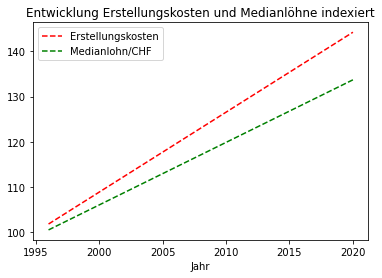

In [47]:
#Grafik nur mit den Trendlinien
z = np.polyfit(df_gemeinden_indexiert.index, df_gemeinden_indexiert["median"], 1)
p = np.poly1d(z)
plt.plot(df_gemeinden_indexiert.index, p(df_gemeinden_indexiert.index), "r--", label="Erstellungskosten")

z = np.polyfit(df_medianlohn.index, df_medianlohn["Medianlohn/CHF"], 1)
p = np.poly1d(z)
plt.plot(df_medianlohn.index, p(df_medianlohn.index), "g--", label="Medianlohn/CHF")

plt.xlabel("Jahr")
plt.title("Entwicklung Erstellungskosten und Medianlöhne indexiert")
plt.legend()

plt.show()